In [1]:
cd /content/drive/My Drive/Dava with ML

/content/drive/My Drive/Dava with ML


In [3]:
!unzip hepatiits_dataset.zip

Archive:  hepatiits_dataset.zip
  inflating: hepatitisdata.csv       


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as m

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
ls

breast-cancer-wisconsin-data.zip  hepatities.ipynb
Cancer.ipynb                      hepatitisdata.csv
cardiovaskular_dataset.zip        indian_liver_patient.csv
chronic-kidney-disease.zip        indian-liver-patient-records.zip
data.csv                          kidney.ipynb
Dataset_spine.csv                 liver.ipynb
diabetes.csv                      new_model.csv
Diabeties.ipynb                   parkinson_dataset.zip
heart.csv                         Parkinson.ipynb
heart-disease-uci.zip             pd_speech_features.csv
heart.ipynb                       pima-indians-diabetes-database.zip
hepatiits_dataset.zip             Spine.ipynb


In [7]:
dataset=pd.read_csv('hepatitisdata.csv')
dataset

,Unnamed: 0,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,?,1
1,1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4,?,1
2,2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4,80,1
3,3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1,?,200,4,?,1
4,4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,149,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,?,242,3.3,50,2
150,150,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,?,2
151,151,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,?,2
152,152,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [0]:
dataset=dataset.drop(['Unnamed: 0'],axis=1)

In [9]:
dataset

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1,?,200,4,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,?,242,3.3,50,2
150,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,?,2
151,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,?,2
152,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


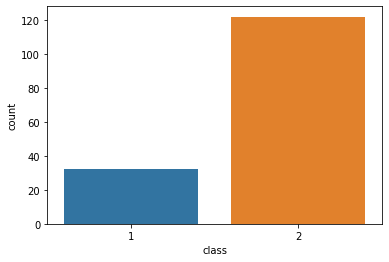

In [10]:
sns.countplot(x='class',data=dataset)

In [0]:
s=dataset.replace('?',0)


In [37]:
s

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4,0,1
2,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1,0,200,4,0,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,0,242,3.3,50,2
150,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,0,2
151,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,0,2
152,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [12]:
dataset['class'].unique()

array([2, 1])

In [39]:
s.corr()

,class,age,sex,antivirals,histology
class,1.000000,-0.217434,0.168242,-0.131803,-0.336033
age,-0.217434,1.000000,0.026052,-0.010648,0.166388
sex,0.168242,0.026052,1.000000,-0.100371,-0.123950
antivirals,-0.131803,-0.010648,-0.100371,1.000000,0.212459
histology,-0.336033,0.166388,-0.123950,0.212459,1.000000


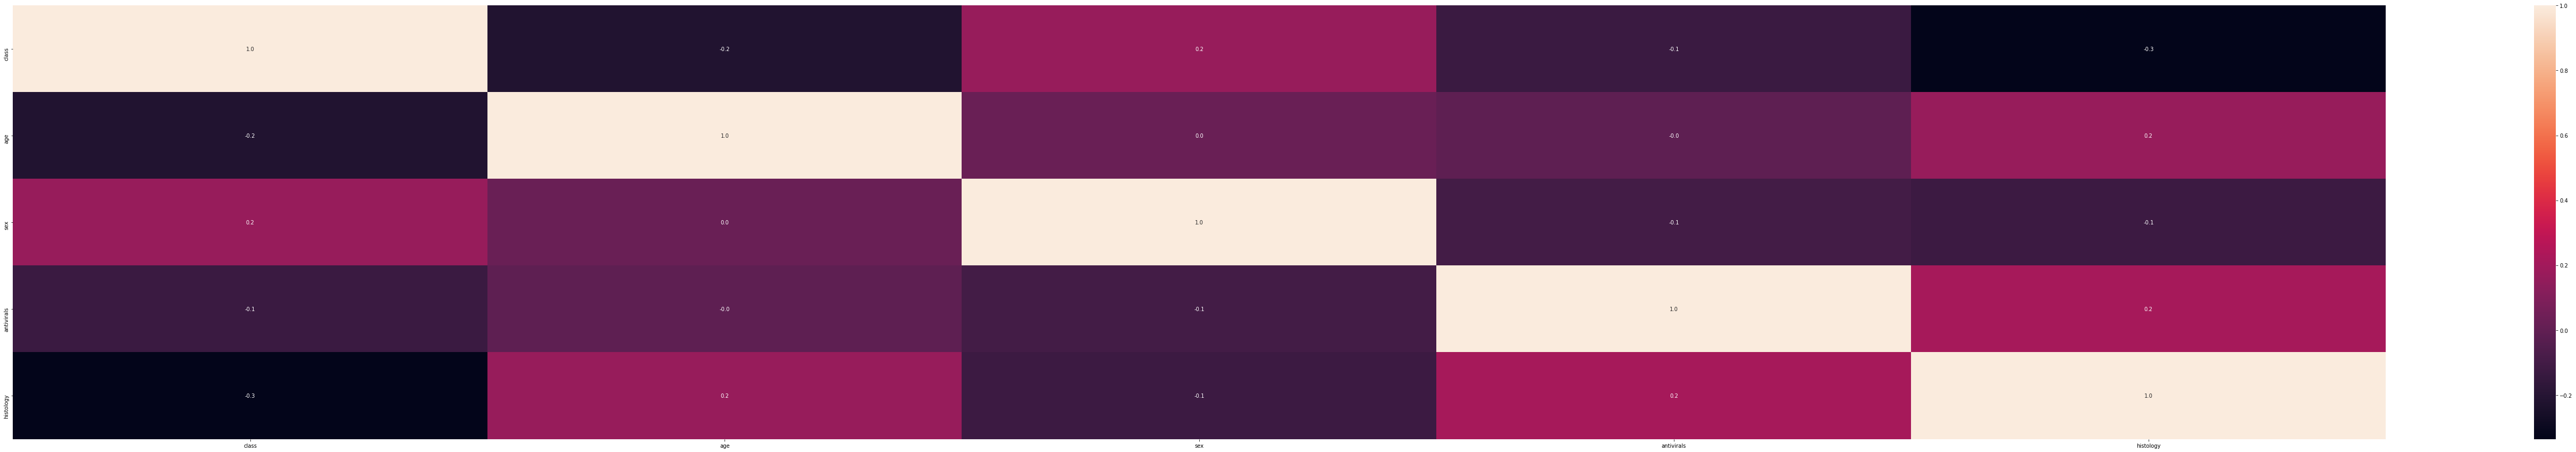

In [15]:
plt.figure(figsize=(100,15))
sns.heatmap(dataset.corr(),annot=True,fmt='.1f')
plt.show()

In [40]:
dataset.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [41]:
dataset

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1,?,200,4,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,?,242,3.3,50,2
150,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,?,2
151,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,?,2
152,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


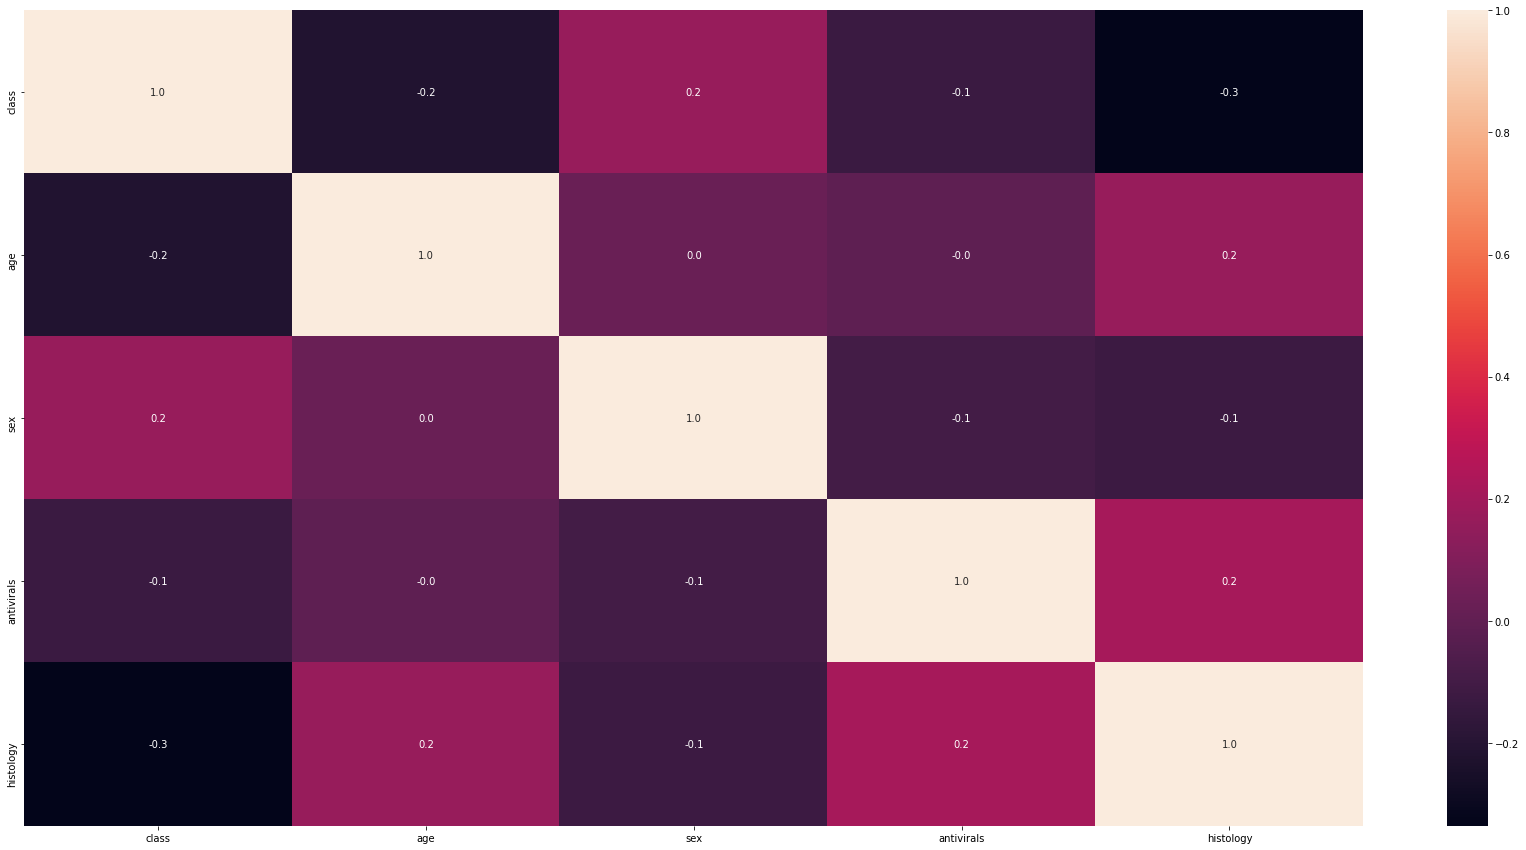

In [42]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True,fmt='.1f')
plt.show()

In [0]:
features=dataset.iloc[:,1:]

In [44]:
features

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,?,1
1,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4,?,1
2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4,80,1
3,34,1,2,2,2,2,2,2,2,2,2,2,2,1,?,200,4,?,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,?,242,3.3,50,2
150,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,?,2
151,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,?,2
152,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [0]:
labels=dataset.iloc[:,0]

In [46]:
labels

0      2
1      2
2      2
3      2
4      2
      ..
149    1
150    2
151    2
152    2
153    1
Name: class, Length: 154, dtype: int64

In [49]:
dataset.describe()

,class,age,sex,antivirals,histology
count,154.000000,154.000000,154.000000,154.000000,154.000000
mean,1.792208,41.272727,1.097403,1.844156,1.454545
std,0.407051,12.574106,0.297473,0.363891,0.499554
min,1.000000,7.000000,1.000000,1.000000,1.000000
25%,2.000000,32.000000,1.000000,2.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000


In [53]:
dataset.dtypes

class              int64
age                int64
sex                int64
steroid           object
antivirals         int64
fatigue           object
malaise           object
anorexia          object
liver_big         object
liver_firm        object
spleen_palable    object
spiders           object
ascites           object
varices           object
bilirubin         object
alk_phosphate     object
sgot              object
albumin           object
protime           object
histology          int64
dtype: object

In [50]:
dataset.isnull().sum()

class             0
age               0
sex               0
steroid           0
antivirals        0
fatigue           0
malaise           0
anorexia          0
liver_big         0
liver_firm        0
spleen_palable    0
spiders           0
ascites           0
varices           0
bilirubin         0
alk_phosphate     0
sgot              0
albumin           0
protime           0
histology         0
dtype: int64

In [0]:
dataset=dataset.replace('?',0)

In [0]:
dataset['bilirubin']=dataset['bilirubin'].astype('float32')
dataset['steroid']=dataset['steroid'].astype('float32')
dataset['protime']=dataset['protime'].astype('float32')
dataset['albumin']=dataset['albumin'].astype('float32')
dataset['sgot']=dataset['sgot'].astype('float32')
dataset['fatigue']=dataset['fatigue'].astype('float32')
dataset['malaise']=dataset['malaise'].astype('float32')
dataset['anorexia']=dataset['anorexia'].astype('float32')
dataset['liver_big']=dataset['liver_big'].astype('float32')
dataset['liver_firm']=dataset['liver_firm'].astype('float32')
dataset['spleen_palable']=dataset['spleen_palable'].astype('float32')
dataset['spiders']=dataset['spiders'].astype('float32')
dataset['ascites']=dataset['ascites'].astype('float32')
dataset['varices']=dataset['varices'].astype('float32')
dataset['alk_phosphate']=dataset['alk_phosphate'].astype('float32')






In [60]:
dataset.dtypes

class               int64
age                 int64
sex                 int64
steroid           float32
antivirals          int64
fatigue           float32
malaise           float32
anorexia          float32
liver_big         float32
liver_firm        float32
spleen_palable    float32
spiders           float32
ascites           float32
varices           float32
bilirubin         float32
alk_phosphate     float32
sgot              float32
albumin           float32
protime           float32
histology           int64
dtype: object

In [61]:
dataset.corr()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
class,1.000000,-0.217434,0.168242,0.124835,-0.131803,0.289698,0.314228,0.109207,0.106824,0.152417,0.179508,0.328650,0.331895,0.248646,-0.423997,-0.050816,-0.054383,0.295469,0.158651,-0.336033
age,-0.217434,1.000000,0.026052,-0.073752,-0.010648,-0.259006,-0.095283,0.103915,-0.134483,-0.096542,-0.124726,-0.203266,-0.123015,-0.112485,0.094122,0.045388,0.074070,-0.189235,-0.066151,0.166388
sex,0.168242,0.026052,1.000000,-0.021353,-0.100371,-0.092964,-0.037475,0.015869,0.048725,-0.000454,-0.090850,-0.081743,0.042879,-0.012920,-0.034479,0.167846,0.005254,-0.028128,0.089103,-0.123950
steroid,0.124835,-0.073752,-0.021353,1.000000,0.104731,0.156180,0.238343,0.088312,0.153380,0.101146,0.074901,0.034440,0.000000,-0.027391,-0.007787,-0.042438,-0.025786,0.206630,0.026870,-0.076290
antivirals,-0.131803,-0.010648,-0.100371,0.104731,1.000000,-0.069783,-0.029023,-0.054053,-0.057534,-0.022287,-0.184754,-0.178756,-0.177731,-0.168995,0.178970,0.041817,0.098257,-0.155348,-0.274729,0.212459
fatigue,0.289698,-0.259006,-0.092964,0.156180,-0.069783,1.000000,0.615538,0.418346,0.181495,0.249264,0.223897,0.377534,0.287126,0.215261,-0.242794,-0.111075,-0.170336,0.196424,0.083309,-0.124294
malaise,0.314228,-0.095283,-0.037475,0.238343,-0.029023,0.615538,1.000000,0.630853,0.200376,0.194336,0.142988,0.374335,0.375023,0.265671,-0.268957,-0.115001,-0.174118,0.222917,0.072812,-0.112753
anorexia,0.109207,0.103915,0.015869,0.088312,-0.054053,0.418346,0.630853,1.000000,0.190325,0.142199,0.183622,0.370430,0.300567,0.287971,-0.243359,0.036048,-0.186226,0.132482,0.112102,-0.046855
liver_big,0.106824,-0.134483,0.048725,0.153380,-0.057534,0.181495,0.200376,0.190325,1.000000,0.710371,0.345002,0.378395,0.344262,0.243075,-0.031457,0.018907,-0.032367,0.109654,0.168080,-0.112834
liver_firm,0.152417,-0.096542,-0.000454,0.101146,-0.022287,0.249264,0.194336,0.142199,0.710371,1.000000,0.321171,0.404799,0.308963,0.293777,-0.067848,-0.180342,-0.146431,0.057459,0.089304,-0.202660


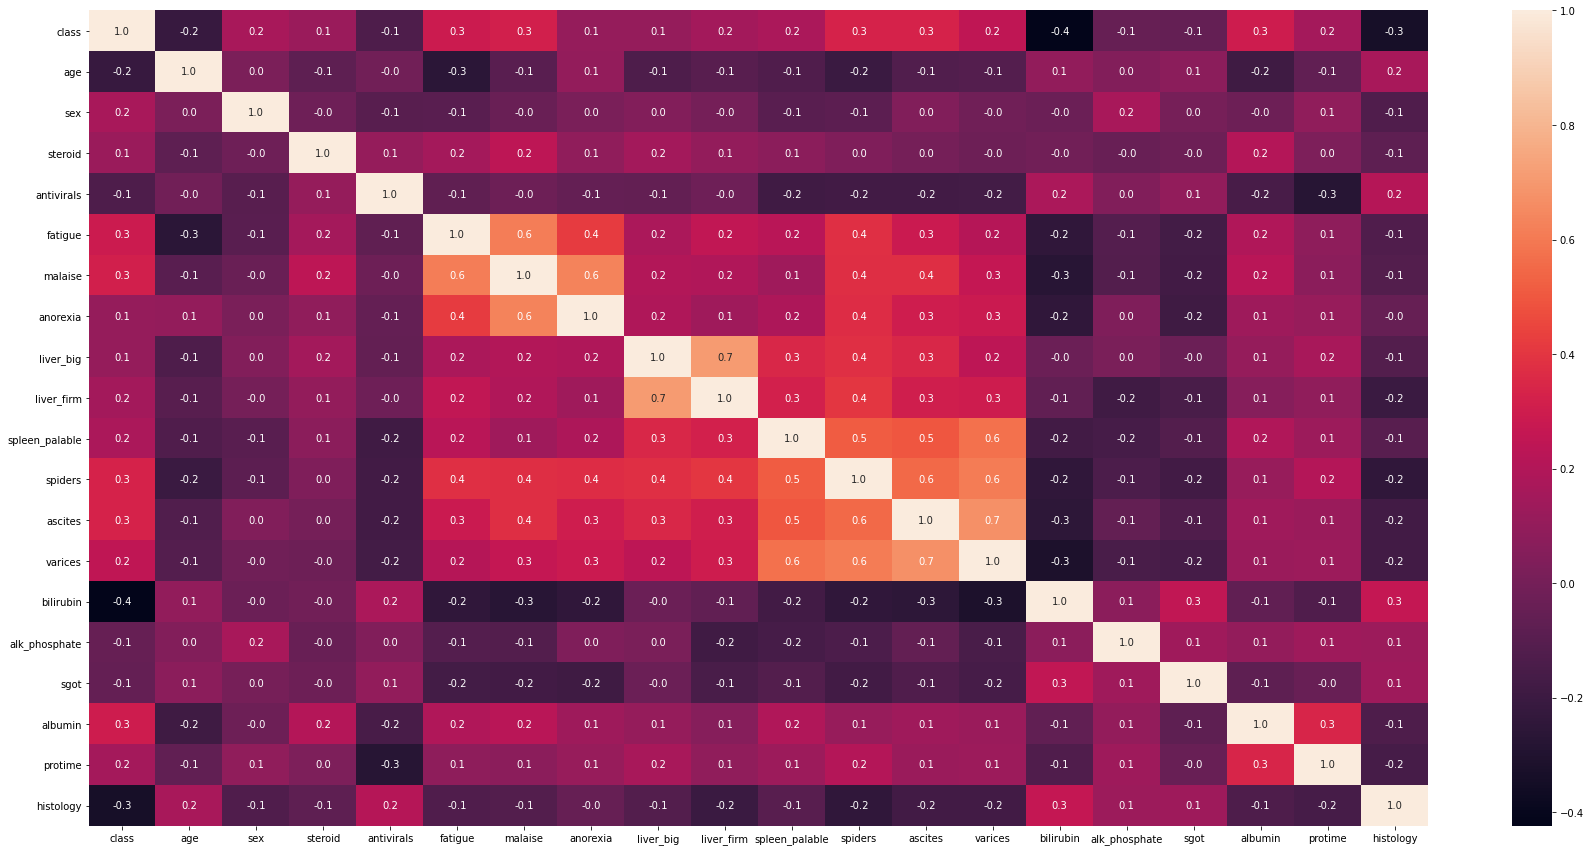

In [62]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True,fmt='.1f')
plt.show()

In [0]:
features=dataset.iloc[:,1:]
labels=dataset.iloc[:,0]

In [0]:
feature_train,feature_test,label_train,label_test=train_test_split(features,labels,test_size=0.2,random_state=42)

##Logistic Regression

In [68]:
model=LogisticRegression(max_iter=1000)
model.fit(feature_train,label_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
label_pred=model.predict(feature_test)

In [70]:
m.accuracy_score(label_test,label_pred)

0.6451612903225806

In [71]:
label_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 2])

In [72]:
label_test

15     2
94     2
152    2
105    1
109    2
65     2
18     2
45     2
36     2
55     2
85     1
142    1
19     2
147    2
86     1
93     1
119    1
12     2
9      2
114    2
29     1
42     2
135    2
67     2
136    2
30     1
96     2
31     2
78     2
66     1
140    1
Name: class, dtype: int64

In [73]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           1       0.40      0.20      0.27        10
           2       0.69      0.86      0.77        21

    accuracy                           0.65        31
   macro avg       0.55      0.53      0.52        31
weighted avg       0.60      0.65      0.60        31



In [74]:
print(m.confusion_matrix(label_test,label_pred))

[[ 2  8]
 [ 3 18]]


##KNN

In [0]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':list(np.arange(1,20))}


In [76]:
model=GridSearchCV(knn,param_grid=param)
model.fit(feature_train,label_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [77]:
model.best_params_

{'n_neighbors': 9}

In [80]:
model=KNeighborsClassifier(n_neighbors=9)
model.fit(feature_train,label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [0]:
label_pred=model.predict(feature_test)

In [82]:
m.accuracy_score(label_test,label_pred)

0.6774193548387096

In [83]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.68      1.00      0.81        21

    accuracy                           0.68        31
   macro avg       0.34      0.50      0.40        31
weighted avg       0.46      0.68      0.55        31



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
print(m.confusion_matrix(label_test,label_pred))

[[ 0 10]
 [ 0 21]]


In [85]:
label_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [86]:
label_test

15     2
94     2
152    2
105    1
109    2
65     2
18     2
45     2
36     2
55     2
85     1
142    1
19     2
147    2
86     1
93     1
119    1
12     2
9      2
114    2
29     1
42     2
135    2
67     2
136    2
30     1
96     2
31     2
78     2
66     1
140    1
Name: class, dtype: int64

##Decision Tree

In [0]:
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier()
param={'max_depth':list(np.arange(1,20))}


In [88]:
model=GridSearchCV(dt,param_grid=param)
model.fit(feature_train,label_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1

In [89]:
model.best_params_

{'max_depth': 4}

In [90]:
model=DecisionTreeClassifier(max_depth=4)
model.fit(feature_train,label_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
label_pred=model.predict(feature_test)

In [92]:
m.accuracy_score(label_test,label_pred)

0.6129032258064516

In [93]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           1       0.38      0.30      0.33        10
           2       0.70      0.76      0.73        21

    accuracy                           0.61        31
   macro avg       0.54      0.53      0.53        31
weighted avg       0.59      0.61      0.60        31



In [94]:
print(m.confusion_matrix(label_test,label_pred))

[[ 3  7]
 [ 5 16]]


In [95]:
label_pred

array([2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 1])

In [96]:
label_test

15     2
94     2
152    2
105    1
109    2
65     2
18     2
45     2
36     2
55     2
85     1
142    1
19     2
147    2
86     1
93     1
119    1
12     2
9      2
114    2
29     1
42     2
135    2
67     2
136    2
30     1
96     2
31     2
78     2
66     1
140    1
Name: class, dtype: int64

##SVM

In [108]:
model=SVC(kernel='linear')
model.fit(feature_train,label_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
label_pred=model.predict(feature_test)

In [110]:
m.accuracy_score(label_test,label_pred)

0.6774193548387096

In [111]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           1       0.50      0.20      0.29        10
           2       0.70      0.90      0.79        21

    accuracy                           0.68        31
   macro avg       0.60      0.55      0.54        31
weighted avg       0.64      0.68      0.63        31



In [112]:
print(m.confusion_matrix(label_test,label_pred))

[[ 2  8]
 [ 2 19]]


In [113]:
label_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2])

In [114]:
label_test

15     2
94     2
152    2
105    1
109    2
65     2
18     2
45     2
36     2
55     2
85     1
142    1
19     2
147    2
86     1
93     1
119    1
12     2
9      2
114    2
29     1
42     2
135    2
67     2
136    2
30     1
96     2
31     2
78     2
66     1
140    1
Name: class, dtype: int64

##RandomForest Classifier

In [0]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
param={'n_estimators':[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200],'max_depth':list(np.arange(1,20))}


In [116]:
model=GridSearchCV(rfc,param_grid=param)
model.fit(feature_train,label_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [117]:
model.best_params_

{'max_depth': 3, 'n_estimators': 30}

In [0]:
model=model.best_estimator_

In [0]:
label_pred=model.predict(feature_test)

In [0]:
m.accuracy_score(label_test,label_pred)

0.9736842105263158

In [120]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           1       1.00      0.10      0.18        10
           2       0.70      1.00      0.82        21

    accuracy                           0.71        31
   macro avg       0.85      0.55      0.50        31
weighted avg       0.80      0.71      0.62        31



In [121]:
print(m.confusion_matrix(label_test,label_pred))

[[ 1  9]
 [ 0 21]]


In [122]:
label_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [123]:
label_test

15     2
94     2
152    2
105    1
109    2
65     2
18     2
45     2
36     2
55     2
85     1
142    1
19     2
147    2
86     1
93     1
119    1
12     2
9      2
114    2
29     1
42     2
135    2
67     2
136    2
30     1
96     2
31     2
78     2
66     1
140    1
Name: class, dtype: int64